# kNN predictor for Fisher Iris
Data Analysis - ISAE 2022/2023 - Ahmad Berjaoui

In [23]:
import os #path handling
import numpy as np #import numpy drives sklearn to use numpy arrays instead of python lists
import pandas as pd #CSV and dataframe handling
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #Data set splitting functions
from sklearn.metrics import confusion_matrix #Confusion matrix
#Needed for SGD
from sklearn.linear_model import SGDClassifier 
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
#Needed for linear classification
from sklearn.svm import LinearSVC
#Needed for neural network
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report


In [24]:
dataPath = './' # path to folder containing the Iris data
dataFile = os.path.join(dataPath,'iris.data') # data file to use

## 1 - Data import and formatting 

In [25]:
# we assign column names based on the description file. 'FType' stands for 'Flower Type'
fullDF = pd.read_csv(dataFile,header=None,names=['sepalL','sepalW','petalL','petalW','FType']) 
fullDF.sample(10) # let's take a random sample from the full data frame

,sepalL,sepalW,petalL,petalW,FType
97,6.2,2.9,4.3,1.3,Iris-versicolor
34,4.9,3.1,1.5,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
46,5.1,3.8,1.6,0.2,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica


In [26]:
fullDF.describe() # quick statistical description of the dataframe

,sepalL,sepalW,petalL,petalW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
# Let's define a mapping function from 'Flower type' to a class number
def dataMap(FType):
  """
  Data mapping function. Assigns a class number, given a class name
  Args:
    FType: (str) Flower type
  Returns: (int) Flower class
  """

  label = 0
  if FType == 'Iris-versicolor':
    label = 0
  elif FType == 'Iris-setosa':
    label = 1
  elif FType == 'Iris-virginica':
    label = 2
  else:
    raise(RuntimeWarning(f'Unknown flower type: {FType}, using default label 0'))
  
  return label

In [28]:
# Let's apply the mapping function to the input data and create a new column called 'Y'
fullDF['Y'] = [dataMap(item) for item in fullDF['FType']]

In [29]:
# Let's check that mapping works on a few random samples
fullDF.sample(10)

,sepalL,sepalW,petalL,petalW,FType,Y
30,4.8,3.1,1.6,0.2,Iris-setosa,1
65,6.7,3.1,4.4,1.4,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
10,5.4,3.7,1.5,0.2,Iris-setosa,1
83,6.0,2.7,5.1,1.6,Iris-versicolor,0
88,5.6,3.0,4.1,1.3,Iris-versicolor,0
127,6.1,3.0,4.9,1.8,Iris-virginica,2
141,6.9,3.1,5.1,2.3,Iris-virginica,2
50,7.0,3.2,4.7,1.4,Iris-versicolor,0
117,7.7,3.8,6.7,2.2,Iris-virginica,2


In [30]:
# Separate data from classes
dataDF = fullDF[['sepalL','sepalW','petalL','petalW']]
classDF = fullDF['Y']

## 2 - Data splitting 

In [31]:
# Let's split the data into training data, and test data. Same splitting should be applied to classes.
# Here, the test data size is 10% of the full dataset
trainData,testData,trainY,testY = train_test_split(dataDF,classDF,test_size=0.1)

## 3 - kNN 

In [32]:
# Let's build a kd Tree out of our training data and use euclidian distance as a metric.
# This can be replaced by a custom metric
kNN = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',metric='minkowski',p=2,n_jobs=-1)
kNN.fit(trainData,trainY)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=3)

In [33]:
# Check the classifier's performance on the training data
trainPredictions = kNN.predict(trainData)
trainCM = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM)

[[42  0  3]
 [ 0 46  0]
 [ 3  0 41]]


## 4 - Classifier performance 

In [34]:
# Check the classifier's performance on the test data
predictions = kNN.predict(testData)
testCM = confusion_matrix(y_pred=predictions,y_true=testY)
print(testCM)

[[5 0 0]
 [0 4 0]
 [0 0 6]]


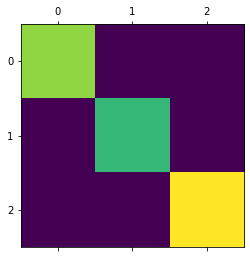

In [35]:
# You can also plot the confusion matrix
plt.matshow(testCM)

In [36]:
# Evaluate the model
accuracy = kNN.score(testData, testY)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


## 5 - SGD

In [37]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(trainData, trainY)


SGDClassifier()

In [38]:
# Check the classifier's performance on the training data
trainPredictions = sgd_classifier.predict(trainData)
trainCM_SGD = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM_SGD)

[[42  0  3]
 [ 1 45  0]
 [ 3  0 41]]


In [39]:
# Make predictions
predictions_SGD = sgd_classifier.predict(testData)
testCM_SGD = confusion_matrix(y_pred=predictions_SGD,y_true=testY)
print(testCM_SGD)

# Evaluate the model
accuracy = sgd_classifier.score(testData, testY)
print("Model Accuracy:", accuracy)

[[5 0 0]
 [0 4 0]
 [0 0 6]]
Model Accuracy: 1.0


## 6 - Linear Classification

In [40]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit Linear Classifier
lin_classifier = LinearSVC(max_iter=2000)
lin_classifier.fit(trainData, trainY)

LinearSVC(max_iter=2000)

In [41]:
# Check the classifier's performance on the training data
trainPredictions = lin_classifier.predict(trainData)
trainCM_lin = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM_lin)

[[41  0  4]
 [ 0 46  0]
 [ 3  0 41]]


In [42]:
# Make predictions
predictions_lin = lin_classifier.predict(testData)
testCM_lin = confusion_matrix(y_pred=predictions_lin,y_true=testY)
print(testCM_lin)

# Evaluate the model
accuracy = lin_classifier.score(testData, testY)
print("Model Accuracy:", accuracy)

[[5 0 0]
 [0 4 0]
 [0 0 6]]
Model Accuracy: 1.0


## 7 - Neural Network

In [45]:
# Standardize features
scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)
testData = scaler.transform(testData)

# Initialize and fit Neural Network
mlp_classifier = MLPClassifier()
mlp_classifier.fit(trainData, trainY)

c:\Users\arthu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [46]:
# Check the classifier's performance on the training data
trainPredictions = mlp_classifier.predict(trainData)
trainCM_mlp = confusion_matrix(y_pred=trainPredictions,y_true=trainY)
print(trainCM_mlp)

[[42  0  3]
 [ 0 46  0]
 [ 4  0 40]]


In [47]:
# Make predictions
predictions_mlp = mlp_classifier.predict(testData)
testCM_mlp = confusion_matrix(y_pred=predictions_lin,y_true=testY)
print(testCM_mlp)

# Evaluate the model
accuracy = mlp_classifier.score(testData, testY)
print("Model Accuracy:", accuracy)

[[5 0 0]
 [0 4 0]
 [0 0 6]]
Model Accuracy: 1.0
